<p align="center">
 <img src='http://www.freelogovectors.net/wp-content/uploads/2018/07/tensorflow-logo.png' width=500>
</p>

# Introduction

Tensorflow is one of the open source libraries used to implement machine learning techniques and other algorithms involving large number of mathematical operations. Tensorflow was developed by Google and it has a capability to use the GPU to accelerate the computation. 

Advantages of TensorFlow:
- Open source and free.
- Reliable (and without major bugs).
- Backed by Google and a good community.

The core component of TensorFlow are the **computational graph** and **tensors** which traverse among all the nodes through edges. TensorFlow allows developers to create dataflow graphs structures that describe how data moves through a graph, or a series of processing nodes. Each node in the graph represents a mathematical operation, and each connection or edge between nodes is a multidimensional data array, or tensor.

<p align="center">
  <img src='https://cdn-images-1.medium.com/max/1600/1*Wv9adjSwmgl4wLE7lSTRIw.png' width=400>
  <img src='https://www.safaribooksonline.com/library/view/python-machine-learning/9781787125933/graphics/B07030_14_02.jpg' width=400>
  </p>

In [1]:
import tensorflow as tf
tf.__version__

'1.12.0'

In [2]:
import numpy as np
import sklearn.datasets as dataset
import matplotlib.pyplot as plt

## Tensor

A tensor consists of a set of primitive values shaped into an array of any number of dimensions (n-dimensional array). 

A session allows to execute graphs or part of graphs. It allocates resources (such as GPUs, memory and network connections) for that and holds the actual values of intermediate results and variables.



In [3]:
t1 = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(t1.shape)

t2 = tf.constant([[1.0, 0.0], [0.0, 1.0], [1.0, 0.0], [0.0, 1.0]])
print(t2.shape)

t3 = tf.matmul(t2, t1)
print(t3)

(2, 3)
(4, 2)
Tensor("MatMul:0", shape=(4, 3), dtype=float32)


The computation of **t3** is not performed yet until it executed using the session.

In [4]:
with tf.Session() as sess:
    print(sess.run(t3))

[[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]]


In [5]:
a = tf.constant([2])
b = tf.constant([3])
c = tf.constant([1])

In [6]:
# Build a dataflow graph.
r1 = a - b
r2 = 2 * r1
z = r2 + c

# Construct a 'Session' to execute the graph.
sess = tf.Session()

# Execute the graph and store the value that 'z' represents in 'result'.
result = sess.run(z)
print(result)

sess.close()

[-1]


There are 3 main data types in Tensorflow namely **Constants**, **Variables** and **Placeholders**.

## Constant

In Tensorflow, a constant is declared with a value (not with any operations) and the value cannot be changed in the future.

Constant can be generated using `tf.constant()` function.

The example of constant is shown as above.

## Variable

A variable is important because it is used to hold the parameters (served as the wrapper of the tensor). Any operations such as training, updating, saving, restoring and etc cannot be performed without having the variables to hold the parameters.

Variable can be created using `tf.get_variable()` or `tf.Variable()` function. The function requires you to specify the variable's name. This name will be used by other replicas to access the same variable, as well as to name this variable's value when checkpointing and exporting models. `tf.get_variable` also allows you to reuse a previously created variable of the same name, making it easy to define models which reuse layers.




In [85]:
# reset graph
tf.reset_default_graph() 

In [86]:
var1 = tf.get_variable(name='var1', shape=[2, 2], dtype=tf.int32, initializer=tf.zeros_initializer)
var1

<tf.Variable 'var1:0' shape=(2, 2) dtype=int32_ref>

In [87]:
with tf.variable_scope('foo'):
    var2 = tf.get_variable(name='var2', dtype=tf.float32, initializer=[[1.,2.,3.], [4.,5.,6.]])
    print(var2)

<tf.Variable 'foo/var2:0' shape=(2, 3) dtype=float32_ref>


In [88]:
with tf.variable_scope('foo', reuse=True):
    var3 = tf.get_variable(name='var2')
    print(var3)

<tf.Variable 'foo/var2:0' shape=(2, 3) dtype=float32_ref>


In [89]:
var4 = tf.Variable([[1.,2.,3.], [4,5,6]], dtype=tf.float32, name='var4')
var4

<tf.Variable 'var4:0' shape=(2, 3) dtype=float32_ref>

In [90]:
a = tf.constant([2])
v_a = tf.get_variable('a', dtype=tf.int32, initializer=a)
print(v_a)

<tf.Variable 'a:0' shape=(1,) dtype=int32_ref>


In [91]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(var1))
    print(sess.run(var2))
    print(sess.run(var3))
    print(sess.run(var4))
    print(sess.run(v_a))

[[0 0]
 [0 0]]
[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2. 3.]
 [4. 5. 6.]]
[2]


## Placeholder


A placeholder is just a variable that can be assigned data later. In general, it allows us to define the operations and build the computation graph first without requiring the data. Then, the data can be fed into the computaiton graph through these placeholders.

Placeholder can be created through `tf.placeholder()` function. In this function, the type and shape of data to be fed later has to be specified. The default way to feed data in is to use `feed_dict` optional argument in `Session.run()`.


In [92]:
x = tf.placeholder(tf.float32, shape=[10, 100])
w = tf.placeholder(tf.float32, shape=[100, 5])
z = tf.matmul(x, w)

with tf.Session() as sess:
    rand_x = np.random.rand(10, 100)
    rand_w = np.random.rand(100, 5)
    print(sess.run(z, feed_dict={x: rand_x, w: rand_w}))

[[21.319515 21.787281 19.643139 21.58694  20.712692]
 [27.02977  25.938698 26.014236 24.557922 27.059628]
 [22.248459 23.774975 21.897022 21.611496 22.546364]
 [25.063072 26.95649  26.546284 25.951574 26.040466]
 [22.080162 24.5242   24.77787  22.467932 22.815832]
 [26.04691  25.547564 26.776907 24.132694 25.604015]
 [26.126747 24.960646 25.627535 23.76771  23.695724]
 [28.501755 26.584126 27.16985  25.686012 25.868113]
 [28.190584 29.48118  28.266188 27.29084  27.641811]
 [27.139755 28.757261 26.74691  26.656818 27.118677]]


## Regression Example

Regression is a common type of predictive analysis. The simplest form of regression equation is `y = xw+b`, where y is the predicted value, `x` is the features, `w` is the weight and `b` is the bias.

In [15]:
train_X, train_y = dataset.make_regression(n_samples=150, n_features=1, random_state=0, noise=5)
print(train_X.shape, train_y.shape)

(150, 1) (150,)


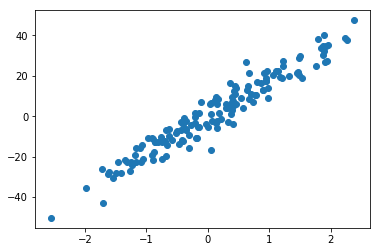

In [16]:
plt.scatter(train_X, train_y)

In [17]:
tf.reset_default_graph() 

X_input = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='X_input')
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y_input')

W = tf.get_variable('weights', shape=[1,1], dtype=tf.float32)
b = tf.get_variable('biases', shape=[1], dtype=tf.float32)

print(X_input.shape, y_input.shape)
print(W)
print(b)

(?, 1) (?, 1)
<tf.Variable 'weights:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'biases:0' shape=(1,) dtype=float32_ref>


In [18]:
# Construct a linear model
pred = tf.add(tf.matmul(X_input, W), b)

# Mean squared error
cost = tf.reduce_mean(tf.square(pred-y_input))

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# Initialize the variables 
init = tf.global_variables_initializer()

In [19]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    
    init_weight, init_bias = sess.run([W,b])

    # Fit all training data
    for epoch in range(1000):
        x = train_X.reshape(-1,1)
        y = train_y.reshape(-1,1)
        _, c = sess.run([optimizer, cost], feed_dict={X_input: x, y_input: y})

        # Display logs per epoch step
        if (epoch+1) % 100 == 0:
            print('Epoch: %03d, Cost: %5f'%(epoch+1, c))

    print("Optimization Finished!")
    
    trained_weight, trained_bias = sess.run([W,b])

Epoch: 100, Cost: 223.863693
Epoch: 200, Cost: 154.789536
Epoch: 300, Cost: 109.778786
Epoch: 400, Cost: 80.377495
Epoch: 500, Cost: 61.124447
Epoch: 600, Cost: 48.484703
Epoch: 700, Cost: 40.165115
Epoch: 800, Cost: 34.674660
Epoch: 900, Cost: 31.041721
Epoch: 1000, Cost: 28.631441
Optimization Finished!


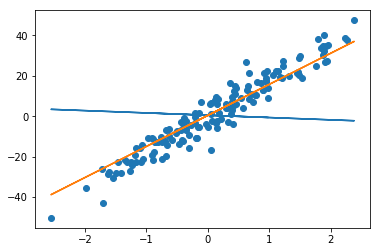

In [395]:
plt.scatter(train_X, train_y)
plt.plot(train_X, train_X*init_weight+init_bias)
plt.plot(train_X, train_X*trained_weight+trained_bias)

# Data Pipeline

Typical models execute through extracting data from disk and performing any necessary preprocessing. For example,  an JPEG image woule be loaded from disk by CPU and decoded into tensor, then preprocessing such as cropping, flipping and batching would be performed. This flow is generally known as the input pipeline. However, this process has become bottleneck as GPU has to wait for the CPU to load the data, and hence the speed of GPU cannot be fully utilized. This is referred as data starvation.


In order to solve this, Dataset API (`tf.data.Dataset`), which allows user to build highly optimized data pipeline, is developed. 


Basically, there are three steps to use the Dataset API:

* **Step 1:** Create a Dataset instance.
* **Step 2:** Create an generator and use it on Dataset instance to iterate through the dataset.
* **Step 3:** Generate data

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

### Simple Example

In [33]:
# Create a simple dataset using arange() function from numpy 
data_1D = np.arange(0, 5)
data_2D = np.random.rand(5,2)

print(data_1D)
print(data_2D)

[0 1 2 3 4]
[[0.22000675 0.4355529 ]
 [0.88975068 0.53888058]
 [0.98549852 0.76918918]
 [0.57909456 0.54413149]
 [0.9387163  0.12894539]]


In [34]:
# Step 1: Create a Dataset instance
dataset_1D = tf.data.Dataset.from_tensor_slices(data_1D)
dataset_2D = tf.data.Dataset.from_tensor_slices(data_2D)

# Step 2: Create an iterator
dataset_1D_iterator = dataset_1D.make_one_shot_iterator()
dataset_2D_iterator = dataset_2D.make_one_shot_iterator()

# Step 3: Generate data
dataset_1D_next_element = dataset_1D_iterator.get_next() 
dataset_2D_next_element = dataset_2D_iterator.get_next() 

In [35]:
with tf.Session() as sess:
    for i in range(5):
        print(sess.run(dataset_1D_next_element))
        print(sess.run(dataset_2D_next_element))

0
[0.22000675 0.4355529 ]
1
[0.88975068 0.53888058]
2
[0.98549852 0.76918918]
3
[0.57909456 0.54413149]
4
[0.9387163  0.12894539]


Some of the functions in `tf.data.Dataset` are:

- `batch()`: Instead of outputing single element, this function combines consecutive elements into batches.

- `shuffle()`:  Randomly shuffles the elements in the dataset.

- `repeat()`:  Repeats the iteration for *n* times.

- `map()`: Maps a custom function across the elements in the dataset.




In [36]:
def print_dataset(dataset):
    with tf.Session() as sess:
        while(True):
            try: 
                print(sess.run(dataset))

            except tf.errors.OutOfRangeError:
                print('End of iteration')
                break

In [37]:
# batch
dataset_2D = tf.data.Dataset.from_tensor_slices(data_2D)
dataset_2D = dataset_2D.batch(2)
dataset_2D_iterator = dataset_2D.make_one_shot_iterator()
dataset_2D_iterator_next = dataset_2D_iterator.get_next()

print_dataset(dataset_2D_iterator_next)

[[0.22000675 0.4355529 ]
 [0.88975068 0.53888058]]
[[0.98549852 0.76918918]
 [0.57909456 0.54413149]]
[[0.9387163  0.12894539]]
End of iteration


In [39]:
# shuffle
dataset_2D = tf.data.Dataset.from_tensor_slices(data_2D)
dataset_2D = dataset_2D.batch(2)

# buffer_size defines the size of buffer from which the next element will be uniformly chosen from
dataset_2D = dataset_2D.shuffle(buffer_size=2)
dataset_2D_iterator = dataset_2D.make_one_shot_iterator()
dataset_2D_iterator_next = dataset_2D_iterator.get_next()

print_dataset(dataset_2D_iterator_next)

[[0.98549852 0.76918918]
 [0.57909456 0.54413149]]
[[0.9387163  0.12894539]]
[[0.22000675 0.4355529 ]
 [0.88975068 0.53888058]]
End of iteration


In [40]:
# repeat
# If no parameter is passed it will loop forever, usually it is good to just loop forever and directly control the number of epochs with a standard loop.
dataset_2D = tf.data.Dataset.from_tensor_slices(data_2D)
dataset_2D = dataset_2D.batch(2)
dataset_2D = dataset_2D.shuffle(buffer_size=2)
dataset_2D = dataset_2D.repeat(2)
dataset_2D_iterator = dataset_2D.make_one_shot_iterator()
dataset_2D_iterator_next = dataset_2D_iterator.get_next()

print_dataset(dataset_2D_iterator_next)

[[0.98549852 0.76918918]
 [0.57909456 0.54413149]]
[[0.9387163  0.12894539]]
[[0.22000675 0.4355529 ]
 [0.88975068 0.53888058]]
[[0.98549852 0.76918918]
 [0.57909456 0.54413149]]
[[0.9387163  0.12894539]]
[[0.22000675 0.4355529 ]
 [0.88975068 0.53888058]]
End of iteration


In [44]:
# map
def map_func(data):
    return data + 1

dataset_2D = tf.data.Dataset.from_tensor_slices(data_2D)
dataset_2D = dataset_2D.batch(2)
dataset_2D = dataset_2D.shuffle(buffer_size=2)
dataset_2D = dataset_2D.repeat(2)
# dataset_2D = dataset_2D.map(map_func)
dataset_2D = dataset_2D.map(lambda x: x+2)
dataset_2D_iterator = dataset_2D.make_one_shot_iterator()
dataset_2D_iterator_next = dataset_2D_iterator.get_next()

print_dataset(dataset_2D_iterator_next)

[[2.22000675 2.4355529 ]
 [2.88975068 2.53888058]]
[[2.98549852 2.76918918]
 [2.57909456 2.54413149]]
[[2.9387163  2.12894539]]
[[2.98549852 2.76918918]
 [2.57909456 2.54413149]]
[[2.9387163  2.12894539]]
[[2.22000675 2.4355529 ]
 [2.88975068 2.53888058]]
End of iteration


In [49]:
# another map
def map_func(data1, data2):
    return data1+1, data2+2

dataset = tf.data.Dataset.from_tensor_slices((data_1D, data_2D))
dataset = dataset.shuffle(buffer_size=3)
dataset = dataset.map(lambda data1, data2: map_func(data1+1, data2+1))
dataset_iterator = dataset.make_one_shot_iterator()
dataset_iterator_next = dataset_iterator.get_next()

print_dataset(dataset_iterator_next)

(4, array([3.98549852, 3.76918918]))
(2, array([3.22000675, 3.4355529 ]))
(5, array([3.57909456, 3.54413149]))
(3, array([3.88975068, 3.53888058]))
(6, array([3.9387163 , 3.12894539]))
End of iteration


### Fashion MNIST Example

Fashion MNIST dataset consists of 70,000 (i.e. a training set of 60,000 examples and a test set of 10,000 examples) grayscale images in 10 classes. 

<p align="center">
  <img src='https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png' width=400>
  
 

In [54]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [55]:
print("Shape of training set",x_train.shape)
print("Shape of training label",y_train.shape)
print("Shape of testing set",x_test.shape)
print("Shape of testing label",y_test.shape)

Shape of training set (60000, 28, 28)
Shape of training label (60000,)
Shape of testing set (10000, 28, 28)
Shape of testing label (10000,)


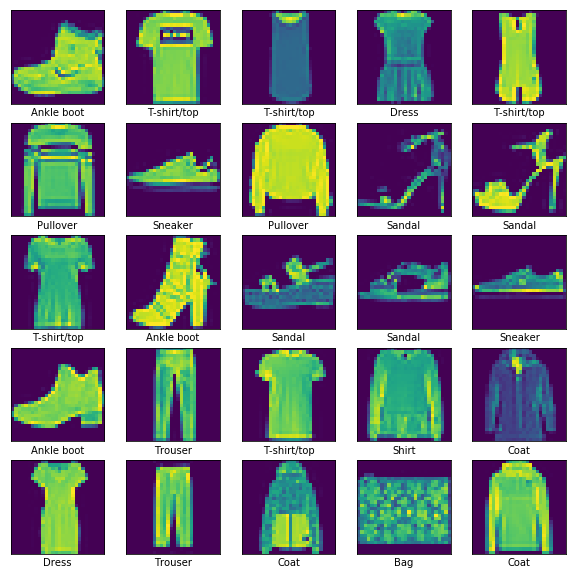

In [56]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [62]:
# Parameters for dataset properties
IMAGE_SIZE = 28
NUM_CHANNELS = 1
NUM_CLASSES = 10

# Parameters for training
BATCH_SIZE = 128

In [63]:
# This function is defined to do the preprocessing of data like reshaping,
# converting to tensors from numpy arrays, one-hot encoding, etc.
def parse_and_preprocess(x,y):
  
    #cast to float32
    x = x/255
    x = tf.reshape(tf.cast(x, tf.float32), (IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))

    #cast to tensor of int32
    y = tf.one_hot(tf.cast(y, tf.uint8), NUM_CLASSES)
    return x, y 

def data_generator(data, label, batch_size=BATCH_SIZE, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((data,label)) 
    
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000)
    
    dataset = dataset.map(parse_and_preprocess)
    dataset = dataset.batch(batch_size)
    dataset = dataset.repeat()
    dataset = dataset.prefetch(1)
    
    dataset_iterator = dataset.make_one_shot_iterator()   
    return dataset_iterator.get_next()

In [64]:
datagen = data_generator(x_train, y_train, batch_size=2)

In [65]:
sess = tf.Session()
for i in range(5):
    train_data, train_label = sess.run(datagen)  
    print(train_data.shape, train_label.shape)

sess.close()

(2, 28, 28, 1) (2, 10)
(2, 28, 28, 1) (2, 10)
(2, 28, 28, 1) (2, 10)
(2, 28, 28, 1) (2, 10)
(2, 28, 28, 1) (2, 10)


In [61]:
sess = tf.Session()
train_data, train_label = data_generator(x_train, y_train, batch_size=BATCH_SIZE)

for i in range(2):
    lbl = sess.run(train_label)  
    print(lbl.shape)
    print(lbl)

sess.close()

(128, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## TFRecord

Tensorflow offers a native format for storing data, `TFRecord`. 

These are binary data files that offer several advantages:

- Smaller file size
- Binary files can be read more quickly from disk
- Integrates seamlessly into Tensorflow's input and preprocessing pipelines
- Very large datasets can be easily read from disk in batches

### Converting a table to a TFRecord structure

TFRecord files are structured files, essentially consisting of key-value pairs stored as 'features'. As an example (modified from the Tensorflow documentation), consider a dataset of movies that are or aren't suggested to a user.

| names | genres | ratings | suggested_to_user |
|-------|--------|---------|-------------------|
| The Shawshank Redemption | Drama | 9.0 | 1 |
| Fight Club | Drama | 9.7 | 0 | 
| The Hobbit | Fantasy | 8.2 | 1 |

Converting this dataset to the TFRecord format would result in the following structure:

    features {
      feature {
        key: "names"
        value { bytes_list {
          value: "The Shawshank Redemption"
          value: "Fight Club"
          value: "The Hobbit"
        }}
      }
      feature {
        key: "genres"
        value { bytes_list {
          value: "Drama"
          value: "Drama"
          value: "Fantasy"
        }}
      }
      feature {
        key: "ratings"
        value { float_list {
          value: 9.0
          value: 9.7
          value: 8.2
        }}
      }
      feature {
        key: "suggested_to_user"
        value { int_list {
          value: 1
          value: 0
          value: 1
      }}
    }


Each column of a data table is converted to a **feature** (`tf.train.Feature`). There are only three feature types and data must be converted to one of these types:

* integer (`tf.train.Int64List`)
* floating point (`tf.train.FloatList`), 
* byte (`tf.train.ByteList`)

Strings can be converted to byte-strings by python to conform to this restriction, e.g. via `my_string.encode('utf-8')`. Alternatively, if the string is hard-coded, it can be defined directly as a byte-string via `my_string = b'Hello World'`) 

The following code transforms the example table above into a TFRecord-compatible format. We start with a pandas data frame. The steps for conversion are:

* **Step 1:** Convert data into one of the three permitted data types.  
* **Step 2:**  Create a `tf.train.Feature` object for each feature
* **Step 3:** Combine all individual features into a single `tf.train.Features` container.
* **Step 4:**  Wrap the `tf.train.Features` object in a `tf.train.Example` wrapper
* **Step 5:** Serialize the `tf.train.Example` object and write it to disk

To make the code more readable, we shall create custom functions that combine the first two steps for each feature type as well as a function that combines steps three and four.

Since the tf.train.Feature class only supports lists (or 1-D arrays). The n-dimensions array such as Image data have to convert into 1D array using `reshape(-1)` or convert the ndarray into bytes by using the following function: 

* **TensorFlow** `tf.compat.as_bytes(img.tostring())` 
* **Numpy** `img.tobytes()`.

### Convert Fashion MNIST dataset into TFRecords format

In [0]:
# Step 1 and Step 2:
# Define helper functions to combine the type conversion 
# and the creation of a tf.train.Feature object. 
# 'val' must be an iterable of a simple type, either an integer, 
# a byte string, or a floating point value, respectively for each function.
def make_int64_feature(val):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[val]))
def make_bytes_feature(val):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[val]))
  
# Step 3 and Step 4:
# Define a helper function to combine the creation of a 
# tf.train.Features and a tf.train.Example object, the latter simply
# being a wrapper around the features dictionary.
# 'features_dict' is a dictionary that maps tf.train.Feature 
# objects to named keys.
def wrap_features(features_dict):
    return tf.train.Example(features=tf.train.Features(
        feature=features_dict))
  
def convert_dataset(image_data, label, dataset_type): 
    # Iterate through images
    out_filename = '{}.tfrecord'.format(dataset_type)
    with tf.python_io.TFRecordWriter(out_filename) as writer:
        for index in range(len(image_data)):
            # Load and preprocess image
            img = image_data[index]
            # img = img.tobytes()
            img = img.tobytes()
            # Define the features
            entry = wrap_features(features_dict={
                'label': make_int64_feature(int(label[index])),
                'image': make_bytes_feature(img)
            })
            
            # Step 5: Serialize the tf.train.Example object and write it to disk
            writer.write(entry.SerializeToString())

In [0]:
convert_dataset(image_data = x_train, label=y_train, dataset_type='train')
convert_dataset(image_data = x_test, label=y_test, dataset_type='test')

### Load data from TFRecords

Note: the data that are converted back from bytes will be in 1-D array format. For example, if the data was n-dimentions arrays such as image tensor (28x28x3), the shape of the data after the convertion from bytes will be (784). To restore back to the previous dimentions, you can use `np.reshape()`

In [0]:
def tfrecords_data_generator(dataset_type, is_training=True, batch_size=BATCH_SIZE):
    filenames = ['{}.tfrecord'.format(dataset_type)]
    dataset = tf.data.TFRecordDataset(filenames=filenames)
    
    # Define a mapping function to decode the serialized string
    def decode_dataset(tfrecord):
        features_dict = {
            'label': tf.FixedLenFeature([], tf.int64),
            'image': tf.FixedLenFeature([], tf.string)
        }
        features = tf.parse_single_example(serialized=tfrecord, features=features_dict)
        image = tf.decode_raw(bytes=features['image'], out_type=tf.uint8)
        image = tf.reshape(image, (IMAGE_SIZE, IMAGE_SIZE))
        label = features['label']
        return image, label
      
    # Assign the mapping function
    dataset = dataset.map(map_func=decode_dataset)

    if is_training:
        dataset = dataset.shuffle(buffer_size=BUFFER_SIZE)
        
    dataset = dataset.map(parse_and_preprocess)
    dataset = dataset.batch(batch_size)
    dataset = dataset.repeat()
    dataset = dataset.prefetch(1)
    
    dataset_iterator = dataset.make_one_shot_iterator() 
    
    return dataset_iterator.get_next()
  

In [0]:
tf_data_gen = tfrecords_data_generator('train', is_training=True, batch_size=2)

In [0]:
sess = tf.Session()
for i in range(3):
    train_data, train_label = sess.run(tf_data_gen)  
    print(train_data.shape, train_label.shape)

sess.close()

## Fashion Image Classification with Convolution Neural Networks (CNN)

CNN architectures scale well with image matrices as they could inherently encode certain properties from input and hence vastly reduce the amount of parameters in the network.

<p align="center">
  <img src='https://i.stack.imgur.com/4uZ9W.png![image.png](attachment:image.png)' width=800>
</p>



The components of CNN architecture consists of **Convolution layers (CONV)**, **Activation layers (ReLU)**, **Pooling layers (POOL)**, and **Fully connected layers (FC)**. 

Typical CNN architecture would look like:

`input_matrix -> CONV -> ReLu -> POOL -> CONV -> ReLu -> POOL -> FC`

With this architecture, CNN transforms the originial images from original pixel matrices to the final class scores. 





### Convolution layers

Convoltion layers consist of a set of learnable **filters/kernels** and perform computations through sliding the filter from top left corner slide to the right, then move down and repeat the process until the bottom right corner has been reached. In the example shown below, the size of filter is 3x3x1 (i.e. 3 pixels width and height, and 1 for depth). For typical RGB images, the depth is 3 for coping with the color channels.

As the sliding process happens, computation occurs by **multiplying** the values of the filter with the original pixel values of the input matrix and **summing** up these values to output a single number. This process is known as **convolving** (and hence the name of convolution layer comes from!).




<p align="center">
  <img src='https://drive.google.com/uc?id=149l4ZdYJPU2oreUNGOJMB_e8eWZGPpjP' width=600>
</p>


#### Stride and Padding

The **stride** factor is used to determine the sliding of the filter. For example, if the stride is 1, then the filters are moved one pixel at a time; and if the stride is 2, then the filters would have to jump 2 pixels at a time. When the stride is more than 1, the output produced would be reduced spatially.

However, sometimes we might not want to reduce the spatial size of the output too quickly. In this case, **zero-padding** is proposed to pad the input with zeros around the border. With this approach, the spatial size of the input could be preserved so that the widths and heights of the input and output are the same.

The formula used to compute  the spatial size of output is $\frac{W-F+2P}{S}+1$, where $W$ is the input size, $F$ is the filter size, $P$ is the padding factor, and $S$ is the stride factor. 

For example, given a $7\times7$ input and $3\times3$ filter with stride 1 and pad 0, the values for variables are shown as follow:

- $W$ = 7,
- $F$ = 3,
- $P$ = 0,
- $S$ = 1


So, by applying the formula, the spatial size of output is $\frac{7-3+2*0}{1}+1$, where it gives us the output of 5. Hence, the spatial size of output is $5\times5$.

### Activation layers

Activation layers basically decide whether if a neuron should be activated by determining if the information received by the neuron is relevant. 

In CNN, activation layers does the **non-linearity** transformation over the output of the convolution layers. Without activation function, it would be a simply linear transformation. A linear transformation have its limitation in solving complex problems.

There are many types of activation, namely Sigmoid, Tanh, ReLU, Leaky ReLU. In the past, tanh and sigmoid were frequently used, but recently **ReLU** has been widely used because of its computational efficiency as well as its merit to alleviate the vanishing gradient problem.



### Pooling Layers

Pooling layers is proposed as the downsampling layers with the objective to reduce the spatial dimension (the length and width reduce but the depth remains the same) of the input. This works well as the exact location of the important feature (i.e. the high activation value) is not as important as its relative location to other features. 

The pooling layers provide two main advantages:

- The amount of parameters and required computation cost can be reduced.
- The issue of overfitting can be solved.

There are 3 common choices for pooling layers: **max pooling**, **average pooling**, and **L2-norm pooling**. 

- **Max Pooling:** Max value is taken from the specified window. In the example below, filter with size of 2x2 and stride of 2 are used to retrieve the maximum value over 4 numbers (2x2 region as shown in same colors), hence discarding 75% of the activations.

- **Average Pooling:** Average value is taken from the specified window. Average pooling was often used historically but has recently been replaced by max pooling that shows to work better in practice.

<p align="center">
  <img src='https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Pooling-Types.png?x31195' width=400>
</p>



References:

https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/



### Fully Connected Layers

FC layers is usually attached after the convolutional layers toward the end of the CNN architecture. FC layer has full connections to all neurons of previous layer (Activation or Pooling layers) and output the $N$ dimensional vector where $N$ is the number of classes or number of the input in the next FC layers.


In [74]:
#input_matrix -> CONV -> ReLu -> POOL -> CONV -> ReLu -> POOL -> FC

# Parameters for conv layer
NUM_FILTERS_1 = 32
NUM_FILTERS_2 = 64
FILTER_SIZE = 3
POOL_SIZE = 2
FC_SIZE_1 = 512

# Parameter for training
BATCH_SIZE = 128
LEARNING_RATE = 1e-4

In [75]:
def init_weights(shape):
    return tf.get_variable(name='W', shape=shape, dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

def init_biases(shape):
    return tf.get_variable(name='B', shape=shape, dtype=tf.float32, initializer=tf.zeros_initializer())

def conv_relu_pool(input, input_channels, filter_size, num_filters, name='conv'):
    with tf.variable_scope(name):
        shape = [filter_size, filter_size, input_channels, num_filters]
        weights = init_weights(shape)
        biases = init_biases(num_filters)

        layer = tf.nn.conv2d(input=input,
                     filter=weights,
                     strides=[1, 1, 1, 1],
                     padding='SAME')

        act = tf.nn.relu(layer + biases)

        pool = tf.nn.max_pool(value=act,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

#         tf.summary.histogram("weights", weights)
#         tf.summary.histogram("biases", biases)
#         tf.summary.histogram("activations", act)

        return pool

def flatten_layer(layer):
    layer_shape = layer.get_shape()

    num_features = layer_shape[1:4].num_elements()

    layer_flat = tf.reshape(layer, [-1, num_features])

    return layer_flat, num_features

def fc_layer(input, num_inputs, num_outputs, name='fc'): 
    with tf.variable_scope(name):
        weights = init_weights([num_inputs, num_outputs])
        biases = init_biases(num_outputs)

        layer = tf.matmul(input, weights) + biases

#         tf.summary.histogram('weights', weights)
#         tf.summary.histogram('biases', biases)

        return layer
        
def cnn():
    x = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS], name='x_input' )
    y = tf.placeholder(tf.float32, shape=[None, NUM_CLASSES], name='y_input' )

#     tf.summary.image('input', x, 3)
    conv1 = conv_relu_pool(input=x, 
                                input_channels=NUM_CHANNELS, 
                                filter_size=FILTER_SIZE, 
                                num_filters=NUM_FILTERS_1,
                                name='conv1')

    conv2 = conv_relu_pool(input=conv1, 
                                input_channels=NUM_FILTERS_1, 
                                filter_size=FILTER_SIZE, 
                                num_filters=NUM_FILTERS_2,
                                name='conv2')

    flatten, num_features = flatten_layer(conv2)


    fc1 = fc_layer(input=flatten,
                       num_inputs=num_features,
                       num_outputs=FC_SIZE_1,
                       name='fc1')
    fc1_relu = tf.nn.relu(fc1)
#     tf.summary.histogram('fc1/relu', fc1_relu)

    logits = fc_layer(input=fc1_relu,
                       num_inputs=FC_SIZE_1,
                       num_outputs=NUM_CLASSES,
                       name='fc2')

    return x, y, logits

In [76]:
tf.reset_default_graph()
x, y, logits = cnn()

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y), name='loss')
#     tf.summary.scalar("loss", loss)

with tf.name_scope('optimize'):
    optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

with tf.name_scope('accuracy'):
    softmax = tf.nn.softmax(logits, name='softmax')
    y_cls = tf.argmax(y, axis=1)
    y_pred_cls  = tf.argmax(softmax, axis=1)
    correct_prediction = tf.equal(y_pred_cls, y_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     tf.summary.scalar("accuracy", accuracy)


In [83]:
import time
import numpy as np

sess = tf.Session()

# summ = tf.summary.merge_all()
# writer = tf.summary.FileWriter('./summaries/1/')
# writer.add_graph(sess.graph)

sess.run(tf.global_variables_initializer())

train_data_generator = data_generator(x_train, y_train, batch_size=BATCH_SIZE)

total_iterations = 0

def train(num_iterations):
    global total_iterations

    start_time = time.time()

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        train_data, train_label = sess.run(train_data_generator)

        loss, acc = sess.run([optimizer, accuracy], feed_dict={x:train_data, y:train_label})
#         loss, acc, s = sess.run([optimizer, accuracy, summ], feed_dict={x:train_data, y:train_label})
        
        if (i+1) % 10 == 0:
#             writer.add_summary(s, i)
            test_accuracy = acc*100
            print("Optimization Iteration: %.2f, Training Accuracy: %.2f%%" % (i+1 , test_accuracy))

    total_iterations += num_iterations

In [78]:
def test():
    test_data_generator = data_generator(x_test, y_test, batch_size=BATCH_SIZE, is_training=False)

    batches_accuracy = []
    test_data_iteration = len(x_test) // BATCH_SIZE
    for _ in range(test_data_iteration):
        try: 
            test_data, test_label = sess.run(test_data_generator)
            acc = sess.run(accuracy, feed_dict={x: test_data, y: test_label})
            batches_accuracy.append(acc)

        except tf.errors.OutOfRangeError:
            print('End of Iteration')
        break
    test_accuracy = (sum(batches_accuracy) / len(batches_accuracy))*100
    print('Test Accuracy: %.2f%%' % (test_accuracy))

In [84]:
train(num_iterations=300)

Optimization Iteration: 10.00, Training Accuracy: 66.41%
Optimization Iteration: 20.00, Training Accuracy: 65.62%
Optimization Iteration: 30.00, Training Accuracy: 74.22%
Optimization Iteration: 40.00, Training Accuracy: 76.56%
Optimization Iteration: 50.00, Training Accuracy: 80.47%
Optimization Iteration: 60.00, Training Accuracy: 76.56%
Optimization Iteration: 70.00, Training Accuracy: 78.12%
Optimization Iteration: 80.00, Training Accuracy: 73.44%
Optimization Iteration: 90.00, Training Accuracy: 71.88%
Optimization Iteration: 100.00, Training Accuracy: 81.25%
Optimization Iteration: 110.00, Training Accuracy: 76.56%
Optimization Iteration: 120.00, Training Accuracy: 78.91%
Optimization Iteration: 130.00, Training Accuracy: 77.34%
Optimization Iteration: 140.00, Training Accuracy: 80.47%
Optimization Iteration: 150.00, Training Accuracy: 76.56%
Optimization Iteration: 160.00, Training Accuracy: 73.44%
Optimization Iteration: 170.00, Training Accuracy: 82.03%
Optimization Iteration:

In [80]:
test()

Test Accuracy: 83.59%


In [82]:
# close the session after finish using it
sess.close()

## Tensorboard

Tensorboard is a tool developed to visualize the graphs, the training parameters, metrics, hyperparameters, and etc to understand, debug, and optimize the neural network model.

Tensorboard provides multiple choices of views that take different formats and display different visualizations.

- `tf.summary.scalar`: To visualize the single scalar values through line charts (e.g. learning rate, classification accuracy).
- `tf.summary.image`: To visualize the image data to check if the image data is inputted correctly.
- `tf.summary.audio`: To visualize the audio data to check if the audio data is inputted correctly.
- `tf.summary.text`: To visualize the text (string) data.
- `tf.summary.graph`: To visualize the computational graph of the model.
- `tf.summary.histogram`: To visualize how data changes over time (e.g. weight, bias).


However, the operations that mentioned above are peripheral to the graphs and none of them could have run without using `tf.summary.merge_all` to generate all the summary data. 

Next, in order to write the summary data to disk, we have to create object from `tf.summary.FileWriter` and use the function `add_summary` to attach the summary data into the FileWriter object. Optionally, Graph object can also be stored into FileWriter object using the function `add_graph` and Tensorboard is able to visualize the graph along with tensor shape information.

`tf.summary.FileWriter` determines the directory where all of the data will be saved from the **logdir** in its constructor. In general, event files is the place where TensorBoard saves summary data into.

In order to start the service of Tensorboard, type in the following command in the terminal: `tensorboard --logdir=summaries`, where **logdir** is the directory that will be used to store data for visualization in Tensorboard. Optionally, we can use `--port=<port_you_like>` to change the port that Tensorboard runs on.






## High Level API - Keras Model

Keras is the high level API of Tensorflow that eases the process of building and training models without sacrificing the flexibility and performance of Tensorflow.

<p align="center">
  <img src='https://www.altoros.com/blog/wp-content/uploads/2017/05/tensorflow-apis-canned-estimators-v114.png' width=500>
  
  *Source: https://www.altoros.com/blog/a-broad-spectrum-of-tensorflow-apis-inside-and-outside-the-project/*

In general, Keras offers several advantages:
 - User Friendly: Keras provides simple and consistent interface for most common use cases.
 - Modular and Composable: The Keras models can be built with connecting configurable building blocks.
  
Keras in Tensorflow can be called via `tensorflow.keras`.



In [36]:
from tensorflow.keras import layers

def keras_model():
    inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))
    x = layers.Conv2D(NUM_FILTERS_1, (FILTER_SIZE, FILTER_SIZE),activation='relu', padding='same')(inputs)
    x = layers.MaxPool2D(pool_size=(POOL_SIZE, POOL_SIZE))(x)
    
    x = layers.Conv2D(NUM_FILTERS_2, (FILTER_SIZE, FILTER_SIZE),activation='relu', padding='same')(x)
    x = layers.MaxPool2D(pool_size=(POOL_SIZE, POOL_SIZE))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(FC_SIZE_1, activation='relu')(x)
    outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
    
    return tf.keras.Model(inputs, outputs)

In [34]:
train_data, train_label = data_generator(x_train, y_train, batch_size=BATCH_SIZE)
test_data_generator = data_generator(x_test, y_test, batch_size=BATCH_SIZE, is_training=False)

model = keras_model()
model.compile('adam', 'categorical_crossentropy', metrics=['acc'])
model.fit(
      train_data, train_label,
      steps_per_epoch=len(x_train) // BATCH_SIZE,
      epochs= 2,
      validation_data=test_data_generator,
      validation_steps=len(x_test) // BATCH_SIZE)

Epoch 1/2
468/468 [==============================] - 67s 144ms/step - loss: 0.4486 - acc: 0.8390 - val_loss: 0.3352 - val_acc: 0.8818
Epoch 2/2
468/468 [==============================] - 59s 126ms/step - loss: 0.2901 - acc: 0.8956 - val_loss: 0.2903 - val_acc: 0.8930


### Alternative way to build keras model

In [39]:
from tensorflow.keras import models

model = models.Sequential()
    
model.add(layers.Conv2D(NUM_FILTERS_1, (FILTER_SIZE, FILTER_SIZE), input_shape=(IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(POOL_SIZE, POOL_SIZE)))
    
model.add(layers.Conv2D(NUM_FILTERS_2, (FILTER_SIZE, FILTER_SIZE)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(POOL_SIZE, POOL_SIZE)))
    
model.add(layers.Flatten())
    
model.add(layers.Dense(FC_SIZE_1))
model.add(layers.Activation('relu'))
    
model.add(layers.Dense(NUM_CLASSES, 'softmax'))

model.compile('adam', 'categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
__________

In [40]:
model.fit(
      train_data, train_label,
      steps_per_epoch=len(x_train) // BATCH_SIZE,
      epochs= 2,
      validation_data=test_data_generator,
      validation_steps=len(x_test) // BATCH_SIZE)

Epoch 1/2
468/468 [==============================] - 52s 110ms/step - loss: 0.4949 - acc: 0.8218 - val_loss: 0.3691 - val_acc: 0.8665
Epoch 2/2
468/468 [==============================] - 42s 89ms/step - loss: 0.3267 - acc: 0.8814 - val_loss: 0.3376 - val_acc: 0.8773


## High Level API - Estimator

Estimator allows users to easily work with pre-implemented models (a.k.a. canned estimator) as well as quickly create new models by customizing the pre-implemented models. The Estimator interface is loosely scikit-learn inspired as Estimator interface follows a **train-evaluate-predict** loop similar to scikit-learn.

In general, Estimator provides several advantages:

- Simplicity in creating models.
- Able to run in CPUs, GPUs, or TPUs without recording the model.
- Ease to share model implementations between developers.

There are several steps involved in applying Estimator API:

- **Step 1:** Define a function to load data to the Estimator.
- **Step 2:** Implement the Estimator, either use canned estimator or create new customised estimator. Note that optimizer, performance metrices have to be defined in the customised estimator.
- **Step 3:** Train the Estimator using the training set loaded from function defined in Step 1.
- **Step 4:** Evaluate the performance of the Estimator using the testing set loaded from function defined in Step 1. 
- **Step 5:** Make predictions with the trained Estimator.

## Canned Estimator

In [57]:
# Parameters for model
HIDDEN_UNIT_SIZE_1 = 256
HIDDEN_UNIT_SIZE_2 = 128

# Parameter for training
NUM_STEPS = 1000

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [59]:
x_train.shape, x_val.shape, x_test.shape

((43740, 28, 28), (4860, 28, 28), (10000, 28, 28))

In [60]:
# This function is defined to do the preprocessing of data like reshaping,
# converting to tensors from numpy arrays, one-hot encoding, etc.
def parse_and_preprocess(x,y):
  
    # cast to float32
    x = x/255
    x = tf.reshape(tf.cast(x, tf.float32), (IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS))

    #cast to tensor of int32
    y = tf.cast(y, tf.int32)
    return (dict({'image':x}),y) 

def data_pipeline(data, label, batch_size=BATCH_SIZE, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((data,label)) 
    
    dataset = dataset.map(parse_and_preprocess)
    
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000)
        dataset = dataset.repeat()
        dataset = dataset.batch(batch_size)
        
    else:
        dataset = dataset.repeat(1)
    
    dataset = dataset.prefetch(1)
    
    dataset_iterator = dataset.make_one_shot_iterator()   
    return dataset_iterator.get_next()

In [61]:
feature_image = tf.feature_column.numeric_column(key='image',shape=(IMAGE_SIZE,IMAGE_SIZE))
feature_column = [feature_image]

In [62]:
model = tf.estimator.DNNClassifier(
    hidden_units=[HIDDEN_UNIT_SIZE_1,HIDDEN_UNIT_SIZE_2],
    n_classes=NUM_CLASSES,
    feature_columns=feature_column,
    model_dir='./canned_model/'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './canned_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c45c416a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [65]:
import time
t1 = time.time()
#steps: hyperparameter to stop the training after a number of training steps.
model.train(input_fn=lambda: data_pipeline(x_train, y_train, batch_size=BATCH_SIZE), steps=NUM_STEPS)
t2= time.time()
print('time taken: {}'.format(t2 - t1))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./canned_model/model.ckpt.
INFO:tensorflow:loss = 316.18445, step = 1
INFO:tensorflow:global_step/sec: 68.7038
INFO:tensorflow:loss = 75.363045, step = 101 (1.457 sec)
INFO:tensorflow:global_step/sec: 158.102
INFO:tensorflow:loss = 48.284843, step = 201 (0.632 sec)
INFO:tensorflow:global_step/sec: 162.662
INFO:tensorflow:loss = 61.68329, step = 301 (0.615 sec)
INFO:tensorflow:global_step/sec: 158.623
INFO:tensorflow:loss = 59.445267, step = 401 (0.630 sec)
INFO:tensorflow:global_step/sec: 168.034
INFO:tensorflow:loss = 53.12765, step = 501 (0.595 sec)
INFO:tensorflow:global_step/sec: 162.996
INFO:tensorflow:loss = 44.005127, step = 601 (0.614 sec)
INFO:tensorflow:global_step/sec: 123.563
INFO:tensorflow:loss

In [70]:
# Evaluate our model using the examples contained in FILE_TEST
# Return value will contain evaluation_metrics such as: loss & average_loss

eval_checkpoint_0 = model.evaluate(
    input_fn=lambda: data_pipeline(x_test, y_test, batch_size=BATCH_SIZE), 
    steps=500, checkpoint_path='./canned_model/model.ckpt-0'
)

eval_checkpoint_1000 = model.evaluate(
    input_fn=lambda: data_pipeline(x_test, y_test, batch_size=BATCH_SIZE), 
    steps=500, checkpoint_path='./canned_model/model.ckpt-1000'
)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-16-07:43:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./canned_model/model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [50/500]
INFO:tensorflow:Evaluation [100/500]
INFO:tensorflow:Evaluation [150/500]
INFO:tensorflow:Evaluation [200/500]
INFO:tensorflow:Evaluation [250/500]
INFO:tensorflow:Evaluation [300/500]
INFO:tensorflow:Evaluation [350/500]
INFO:tensorflow:Evaluation [400/500]
INFO:tensorflow:Evaluation [450/500]
INFO:tensorflow:Evaluation [500/500]
INFO:tensorflow:Finished evaluation at 2018-10-16-07:43:55
INFO:tensorflow:Saving dict for global step 0: accuracy = 0.13357812, average_loss = 2.4287577, global_step = 0, loss = 310.88098
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 0: ./canned_model/model.ckpt-0
INFO:tensorflow:Calling 

In [77]:
eval_checkpoint_0, eval_checkpoint_1000

({'accuracy': 0.13357812,
  'average_loss': 2.4287577,
  'loss': 310.88098,
  'global_step': 0},
 {'accuracy': 0.8602344,
  'average_loss': 0.3898154,
  'loss': 49.89637,
  'global_step': 1000})

## Custom Estimator

In [84]:
PREDICT = tf.estimator.ModeKeys.PREDICT
EVAL = tf.estimator.ModeKeys.EVAL
TRAIN = tf.estimator.ModeKeys.TRAIN

def cnn(x_dict, n_classes, dropout, reuse, mode):
    # Define a scope for reusing the variables
    with tf.variable_scope('CNN', reuse=reuse):
        # TF Estimator input is a dict, in case of multiple inputs
        x = x_dict['image']

        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, NUM_FILTERS_1, FILTER_SIZE, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, POOL_SIZE, POOL_SIZE)

        # Convolution Layer with 64 filters and a kernel size of 3
        conv2 = tf.layers.conv2d(conv1, NUM_FILTERS_2, FILTER_SIZE, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, POOL_SIZE, POOL_SIZE)

        # Flatten the data to a 1-D vector for the fully connected layer
        flatten = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(flatten, FC_SIZE_1)
        # Apply Dropout (if is_training is False, dropout is not applied)
        dropout = tf.layers.dropout( inputs=fc1, rate=0.5, training=(mode==TRAIN))
        # Output layer, class prediction
        out = tf.layers.dense(dropout, n_classes)

    return out


def model_fn(features, labels, mode):
    logits = cnn(features, NUM_CLASSES, dropout=0.5, reuse=False, mode=mode)
    
    loss = None
    train_op = None
    eval_metric_ops= {}
    
    # Predictions
    pred = tf.argmax(logits, axis=1)
    
    if mode in (TRAIN, EVAL):
        loss = tf.losses.sparse_softmax_cross_entropy(
            labels=tf.cast(labels, tf.int32),
            logits=logits)
        
        eval_metric_ops = {
            'accuracy': tf.metrics.accuracy(
                labels=labels,
                predictions=pred,
                name='accuracy')
        }
        
        if mode == TRAIN:
            optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
            train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
            
    
    predictions = {
        'classes': pred,
        'probabilities': tf.nn.softmax(logits, name='softmax_tensor')
    }
    
    return tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=predictions,
        loss=loss,
        train_op=train_op,
        eval_metric_ops=eval_metric_ops
    )
        

In [85]:
# Build the Estimator
model = tf.estimator.Estimator(model_fn,model_dir='./custom_model/')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './custom_model/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a27ca87b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [86]:
t1 = time.time()
model.train(input_fn=lambda: data_pipeline(x_train, y_train, batch_size=BATCH_SIZE), steps=NUM_STEPS)
t2= time.time()
print('time taken: {}'.format(t2 - t1))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./custom_model/model.ckpt.
INFO:tensorflow:loss = 2.31679, step = 1
INFO:tensorflow:global_step/sec: 12.1296
INFO:tensorflow:loss = 0.78151375, step = 101 (8.245 sec)
INFO:tensorflow:global_step/sec: 13.0788
INFO:tensorflow:loss = 0.6550913, step = 201 (7.646 sec)
INFO:tensorflow:global_step/sec: 13.6039
INFO:tensorflow:loss = 0.5412997, step = 301 (7.351 sec)
INFO:tensorflow:global_step/sec: 14.0911
INFO:tensorflow:loss = 0.49127817, step = 401 (7.097 sec)
INFO:tensorflow:global_step/sec: 14.1924
INFO:tensorflow:loss = 0.5819621, step = 501 (7.046 sec)
INFO:tensorflow:global_step/sec: 14.3007
INFO:tensorflow:loss = 0.51784116, step = 601 (6.993 sec)
INFO:tensorflow:global_step/sec: 13.7404
INFO:tensorflow:l

In [81]:
# Use the Estimator 'evaluate' method
estimator_eval = model.evaluate(
    input_fn=lambda: data_pipeline(x_val, y_val, batch_size=BATCH_SIZE, is_training=True),
    steps=500,
    checkpoint_path='./custom_model/model.ckpt-1000'
)
print("------------------")
print("Evaluation results")
for key in estimator_eval:
    print("{} is {}".format(key, estimator_eval[key]))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-16-07:55:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./custom_model/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [50/500]
INFO:tensorflow:Evaluation [100/500]
INFO:tensorflow:Evaluation [150/500]
INFO:tensorflow:Evaluation [200/500]
INFO:tensorflow:Evaluation [250/500]
INFO:tensorflow:Evaluation [300/500]
INFO:tensorflow:Evaluation [350/500]
INFO:tensorflow:Evaluation [400/500]
INFO:tensorflow:Evaluation [450/500]
INFO:tensorflow:Evaluation [500/500]
INFO:tensorflow:Finished evaluation at 2018-10-16-07:55:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.84204686, global_step = 1000, loss = 0.43508103
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: ./custom_model/model.ckpt-1000
------------------
Evaluation resu

In [82]:
estimator_predict = model.predict(
    input_fn=lambda: data_pipeline(x_test, y_test, is_training=False),
    checkpoint_path='./custom_model/model.ckpt-1000'
)

pred_class=[]
pred_proba=[]
for p in estimator_predict:
    pred_class.append(p['classes'])
    pred_proba.append(p['probabilities'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./custom_model/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [83]:
print(pred_class)

[9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5, 1, 6, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 4, 9, 2, 1, 4, 6, 2, 6, 5, 6, 4, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 1, 6, 7, 1, 8, 0, 1, 2, 2, 3, 4, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 2, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 1, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 9, 4, 2, 0, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 8, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 2, 7, 4, 8, 5, 3, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 6, 6, 2, 9, 7, 3, 5, 5, 4, 8, 5, 6, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 0, 1, 3, 0, 4, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 4, 6, 7, 5, 3, 5, 9, 5, 6, 5, 5, 1, 9, 8, 3, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 2, 6, 2, 4, 7, 1, 6, 4, 0, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 7, 6, 

**Reference:**

- http://adventuresinmachinelearning.com/tensorflow-dataset-tutorial/
- https://gist.github.com/datlife/abfe263803691a8864b7a2d4f87c4ab8
- https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428
- https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py
- https://medium.com/coinmonks/beginners-guide-to-feeding-data-in-tensorflow-faf21a745e4c
- https://www.tensorflow.org/guide/keras
- https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
- http://cs231n.github.io/convolutional-networks/
- https://developers.googleblog.com/2017/09/introducing-tensorflow-datasets.html
- http://androidkt.com/cnn-keras-with-mnist-accuracy-9953/
- https://medium.com/tensorflow/training-and-serving-ml-models-with-tf-keras-fd975cc0fa27
- https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a